In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [338]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

/var/folders/lg/b9vtb_xx1qv8jkcb20xprp600000gn/T/ipykernel_7200/43731904.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [339]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [340]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [341]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [342]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()

In [343]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

In [344]:
df = df.apply(pd.to_numeric, errors='coerce')

In [345]:
# Drop the original 'Date' and 'Time' columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Convert the 'Datetime' column to a datetime dtype
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract the date and time components from the 'Datetime' column
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [346]:
df.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
Date                             object
Time                             object
dtype: object

In [347]:
df.Date[0]

datetime.date(2006, 12, 16)

In [348]:
df.Time[0]

datetime.time(17, 24)

In [349]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


<AxesSubplot:>

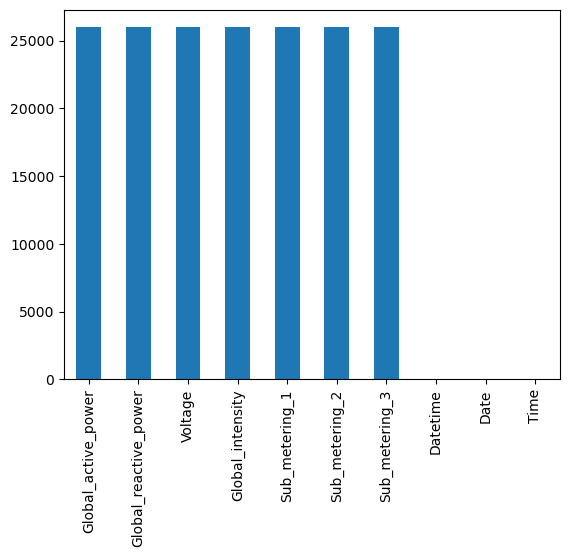

In [350]:
df.isna().sum().plot.bar()

<AxesSubplot:xlabel='Date'>

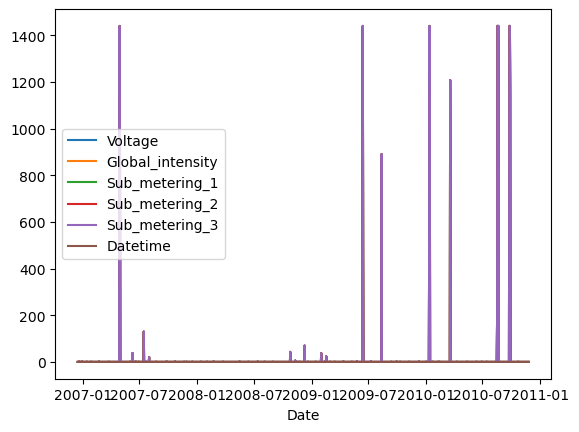

In [351]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1])

In [352]:
df.dropna(inplace=True)

In [353]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-02 00:59:44.397740544
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-10 05:37:45
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-11-30 01:22:30
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-11-23 20:31:15
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


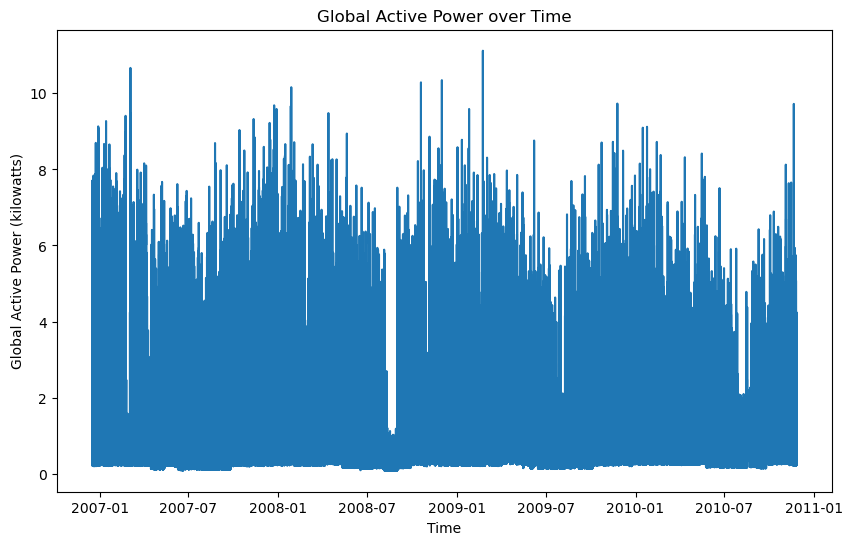

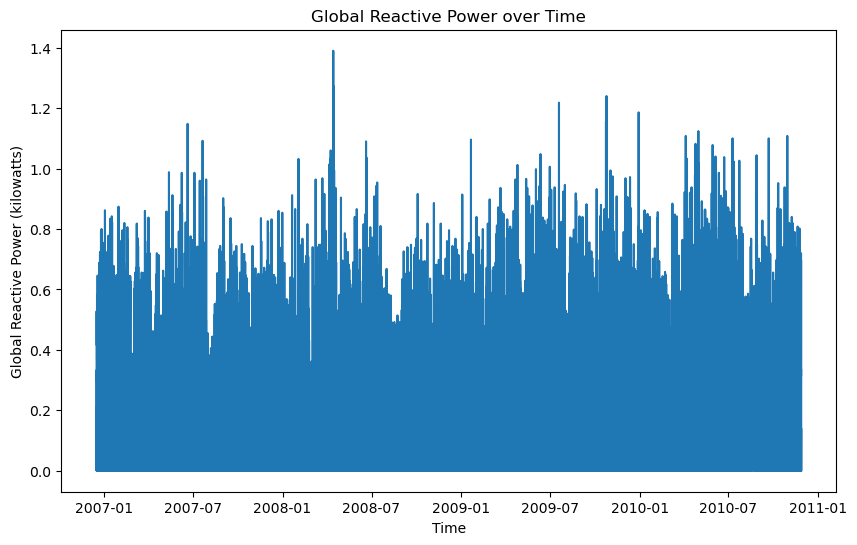

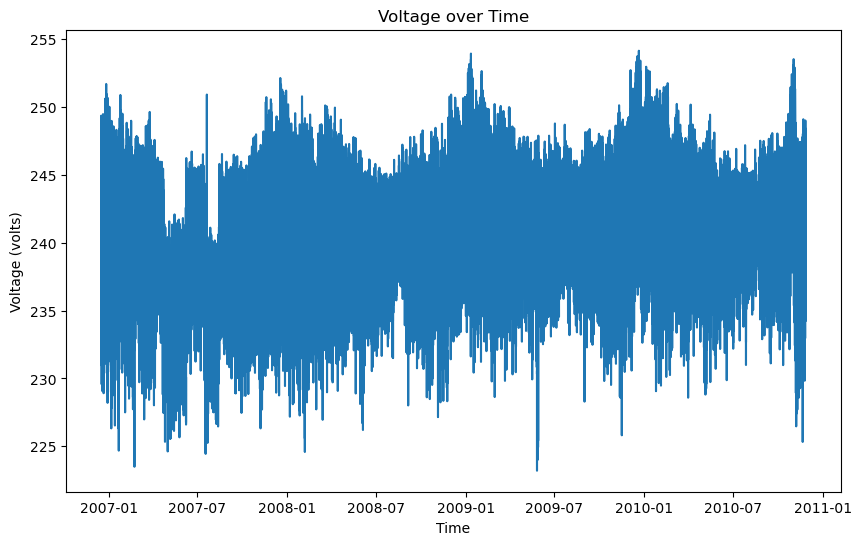

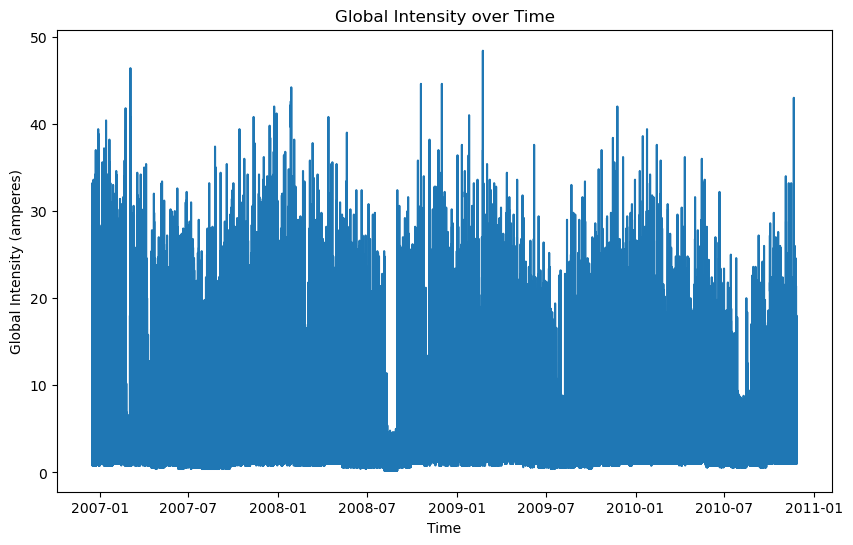

In [354]:
# Create line charts of four variables over time
plt.figure(figsize=(10,6))
plt.plot(df['Datetime'], df['Global_active_power'])
plt.title('Global Active Power over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')

plt.figure(figsize=(10,6))
plt.plot(df['Datetime'], df['Global_reactive_power'])
plt.title('Global Reactive Power over Time')
plt.xlabel('Time')
plt.ylabel('Global Reactive Power (kilowatts)')

plt.figure(figsize=(10,6))
plt.plot(df['Datetime'], df['Voltage'])
plt.title('Voltage over Time')
plt.xlabel('Time')
plt.ylabel('Voltage (volts)')

plt.figure(figsize=(10,6))
plt.plot(df['Datetime'], df['Global_intensity'])
plt.title('Global Intensity over Time')
plt.xlabel('Time')
plt.ylabel('Global Intensity (amperes)')

plt.show()

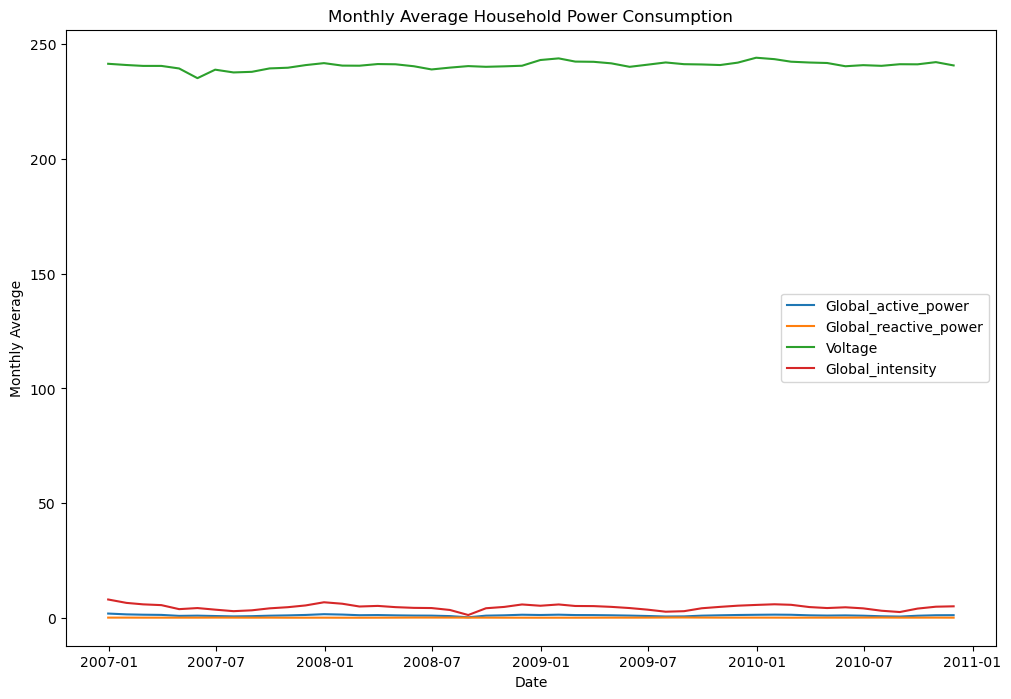

In [355]:
# Group the data by month and year and compute the monthly average
monthly_avg = df.groupby(pd.Grouper(key='Datetime', freq='M')).mean()

# Plot the data using matplotlib
fig, ax = plt.subplots(figsize=(12, 8))
c=0
for column in monthly_avg.columns:
    c+=1
    ax.plot(monthly_avg.index, monthly_avg[column], label=column)
    if c==4:
        break

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Average')
ax.set_title('Monthly Average Household Power Consumption')
plt.show()

In [356]:

cols_to_average = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity","Date"]
df_ma = df[cols_to_average].rolling(window=30, min_periods=1).mean()



/var/folders/lg/b9vtb_xx1qv8jkcb20xprp600000gn/T/ipykernel_7200/3917849151.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df_ma = df[cols_to_average].rolling(window=30, min_periods=1).mean()


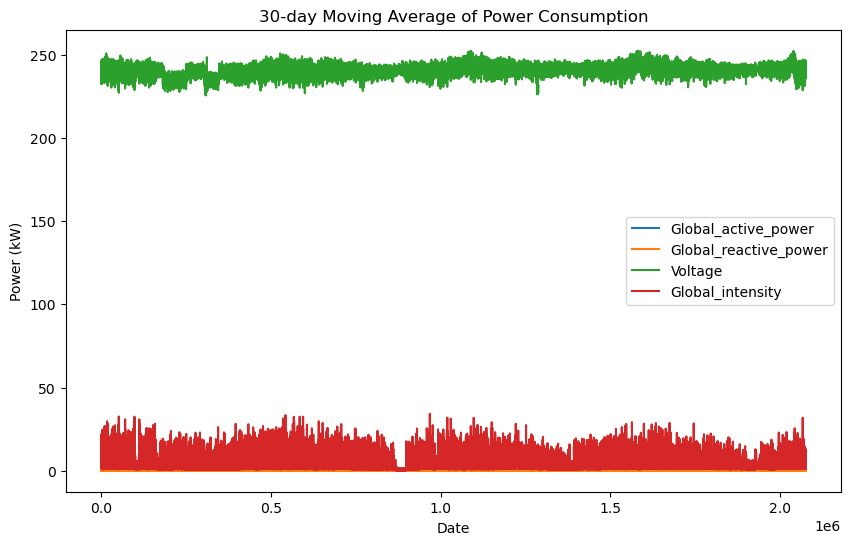

In [357]:
import matplotlib.pyplot as plt

cols_to_average = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]
df_ma = df[cols_to_average].rolling(window=30, min_periods=1).mean()

# Set up the plot
fig, ax = plt.subplots(figsize=(10,6))

# Plot the moving average data for each column
for col in cols_to_average:
    ax.plot(df_ma.index, df_ma[col], label=col)

# Add a title and labels
ax.set_title('30-day Moving Average of Power Consumption')
ax.set_xlabel('Date')
ax.set_ylabel('Power (kW)')
ax.legend()

# Display the plot
plt.show()


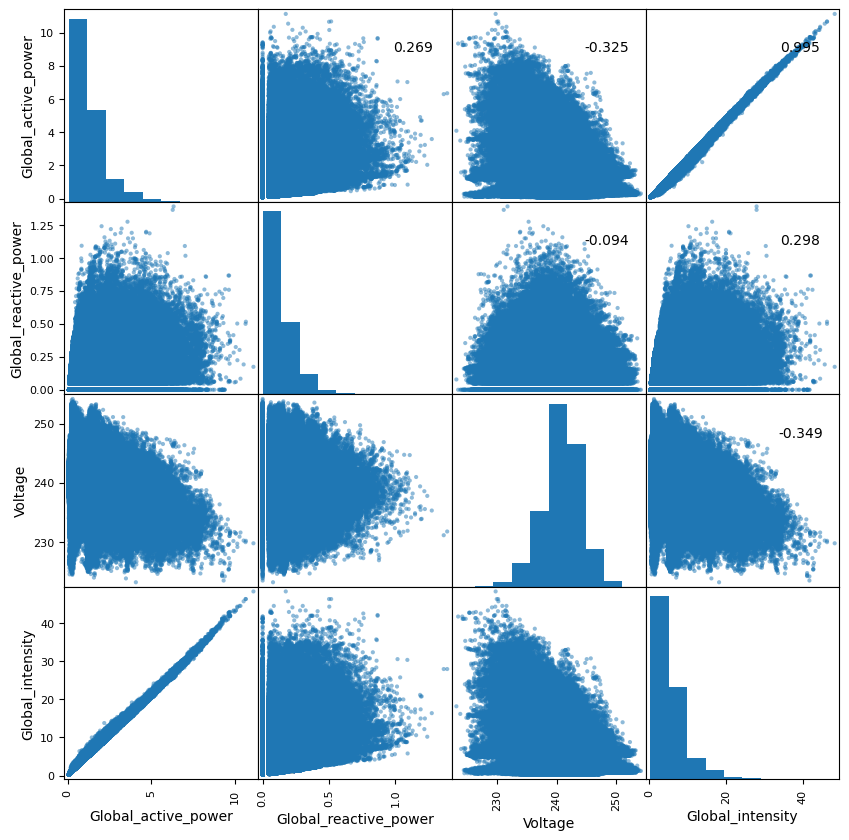

In [358]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()